# Kruskal Algorithm

Implementation and test of Kruskal algorithm for the Minimum Cost Spanning Tree Problem (MST). Unlike Prim-Dijkstra algorithm, Kruskal focus on the edges, selecting them one by one, starting from the ones with minimum cost. The algorithm has a time complexity of $O(mlogn + n^2)$, worse than that of Prim-Dijkstra, however it is possible to reduce it using an appropriate "*union-find*" data structure to represent the connected components.

Required packages for graph and plotting:

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

Code for the Kruskal Algorithm

In [36]:
def kruskal(G):

  #list of nodes and edges in the input graph
  node_list = list(G.nodes)
  edge_list = list(G.edges)

  #number of nodes and edges
  n = len(node_list)
  m = len(edge_list)

  #sort the edges in the list by their cost
  edge_sorted = sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))
  #print(edge_sorted)

  #final MST which will contains all the chosen edges
  mst = []
  #cost of the MST
  cost = 0

  #counter for the nodes
  k = 0
  #counter for the edges
  h = 0

  #add comp[i] attribute to every node in the graph
  nx.set_node_attributes(G, 0, 'comp')
  for i, node in enumerate(G.nodes):
    G.nodes[node]['comp'] = i

  while k < n-1 and h < m:
    #pick the edge of minimum cost among the ones remaining (removing the attribute wieght)
    e = (edge_sorted[h][0], edge_sorted[h][1])
    h += 1
    
    #nodes of the edge e
    i = e[0]
    j = e[1]

    #components of the two nodes
    comp_i = G.nodes[i]['comp']
    comp_j = G.nodes[j]['comp']

    #if the two component are different it is possible to choose the edge
    if comp_i != comp_j:
      #increase the number of chosen edges in the MST
      k += 1
      mst.append(e)
      cost += G[i][j]['weight']

      #combine components C1 and C2 (they could contains more than a single node, for this reason it is necessary to scan all the nodes)
      for node in G.nodes:
        if G.nodes[node]['comp'] == comp_j:
          G.nodes[node]['comp'] = comp_i

  return mst, cost

### Test and plotting

In [38]:
G = nx.Graph()
G.add_edge(1, 3, weight=10)
G.add_edge(1, 4, weight=7)
G.add_edge(1, 6, weight=8)
G.add_edge(2, 3, weight=2)
G.add_edge(2, 5, weight=1)
G.add_edge(3, 4, weight=4)
G.add_edge(3, 5, weight=1)
G.add_edge(4, 5, weight=4)
G.add_edge(4, 7, weight=3)
G.add_edge(5, 6, weight=10)
G.add_edge(5, 7, weight=7)
G.add_edge(6, 7, weight=3)

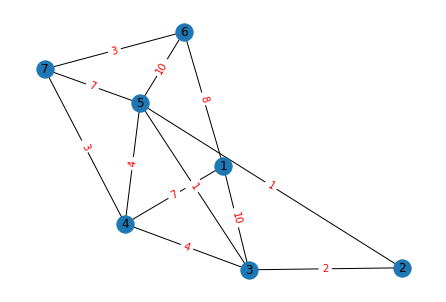

In [39]:
edge_labels = {}
for edge in G.edges:
  edge_labels[edge] = G[edge[0]][edge[1]]['weight']

pos = nx.spring_layout(G)

nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
plt.show()

Run Kruskal algorithm on the example graph G

In [45]:
tree, cost = kruskal(G)
print(tree)
print('Cost of the Minimum Spanning Tree: ', cost)

[(3, 5, {'weight': 1, 'color': 'red'}), (2, 5, {'weight': 1, 'color': 'red'}), (3, 2, {'weight': 2, 'color': 'black'}), (4, 7, {'weight': 3, 'color': 'red'}), (6, 7, {'weight': 3, 'color': 'red'}), (3, 4, {'weight': 4, 'color': 'red'}), (4, 5, {'weight': 4, 'color': 'black'}), (1, 4, {'weight': 7, 'color': 'red'}), (5, 7, {'weight': 7, 'color': 'black'}), (1, 6, {'weight': 8, 'color': 'black'}), (1, 3, {'weight': 10, 'color': 'black'}), (6, 5, {'weight': 10, 'color': 'black'})]
[(3, 5), (2, 5), (4, 7), (6, 7), (3, 4), (1, 4)]
Cost of the Minimum Spanning Tree:  19


Plot the graph G with the MST highlighted in a different color

In [41]:
for edge in G.edges:
  if edge in tree:
    G[edge[0]][edge[1]]['color'] = 'red'
  else:
    G[edge[0]][edge[1]]['color'] = 'black'

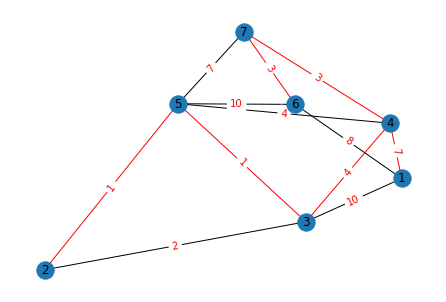

In [42]:
pos = nx.spring_layout(G)

edge_color_list = [G[e[0]][e[1]]['color'] for e in G.edges]

nx.draw(G, pos=pos, edge_color=edge_color_list, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='red')
plt.show()